## Import Libraries

In [1]:
#importing libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

## Import Dataset

In [3]:
ds = pd.read_csv("train.csv")
print(ds.shape)
ds.head(1000)

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


## Exploratory Data Analysis (EDA)

In [4]:
ds.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [5]:
ds['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

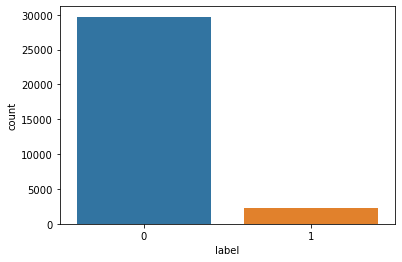

In [6]:
sns.countplot(x = 'label',data = ds)

## Data Preprocessing

In [7]:
#drop unwanted column
ds.drop('id', axis=1, inplace=True)
ds.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [8]:
def text_cleaning(text):
    text = re.sub(r'@[\w]*','',text) #Removing Twitter Handles (@user)
    text = re.sub(r'http/S+','',text) #Removing urls from text 
    text = re.sub(r'#','',text) #Removing hashtags from text 
    text = re.sub(r'[^A-Za-z#]',' ',text) #Removing Punctuations, Numbers, and Special Characters
    text = text.lower()
    
    return text

In [9]:
ds['tweet'] = ds['tweet'].apply(text_cleaning)
ds.head(1000)

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for lyft credit i can t use cause the...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation
5,0,huge fan fare and big talking before the...
6,0,camping tomorrow danny
7,0,the next school year is the year for exams ...
8,0,we won love the land allin cavs champion...
9,0,welcome here i m it s so gr


#### Sexist/Racist Tweets

In [10]:
ds[ds['label']==1].head(1000)

,label,tweet
13,1,cnn calls michigan middle school build the w...
14,1,no comment in australia opkillingbay seash...
17,1,retweet if you agree
23,1,lumpy says i am a prove it lumpy
34,1,it s unbelievable that in the st century we ...
56,1,lets fight against love peace
68,1,the white establishment can t have blk fol...
77,1,hey white people you can call people white...
82,1,how the altright uses amp insecurity to lur...
111,1,i m not interested in a linguistics that does...


#### Non-Sexist/Racist Tweets

In [11]:
ds[ds['label']==0].head(1000)

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for lyft credit i can t use cause the...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation
5,0,huge fan fare and big talking before the...
6,0,camping tomorrow danny
7,0,the next school year is the year for exams ...
8,0,we won love the land allin cavs champion...
9,0,welcome here i m it s so gr


#### Turn the label to an array of numeric values

In [12]:
sentiment_label = ds.label.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 Int64Index([0, 1], dtype='int64'))

#### Retrieve the text data from dataset

In [13]:
tweet = ds.tweet.values
print(tweet)

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    run'
 '  thanks for lyft credit i can t use cause they don t offer wheelchair vans in pdx     disapointed getthanked'
 '  bihday your majesty' ...
 'listening to sad songs on a monday morning otw to work is sad  '
 ' sikh temple vandalised in in calgary  wso condemns  act  '
 'thank you  for you follow  ']


#### Break down all the words/sentences of a text into tokens

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 50000)

tokenizer.fit_on_texts(tweet)

#### Initialize the variables for later application

In [15]:
vocab_size = len(tokenizer.word_index) + 1

In [16]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

#### Make the sentences to have equal length

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

## Text Classifier

#### Build the Text Classifier

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1209440   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,226,091
Trainable params: 1,226,091
Non-trainable params: 0
______________________________________________

#### Train the sentiment analysis model

In [19]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
800/800 [==============================] - 215s 258ms/step - loss: 0.2016 - accuracy: 0.9389 - val_loss: 0.1288 - val_accuracy: 0.9534
Epoch 2/5
800/800 [==============================] - 205s 256ms/step - loss: 0.0935 - accuracy: 0.9678 - val_loss: 0.1152 - val_accuracy: 0.9600
Epoch 3/5
800/800 [==============================] - 215s 269ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.1181 - val_accuracy: 0.9600
Epoch 4/5
800/800 [==============================] - 201s 251ms/step - loss: 0.0403 - accuracy: 0.9865 - val_loss: 0.1366 - val_accuracy: 0.9615
Epoch 5/5
800/800 [==============================] - 203s 254ms/step - loss: 0.0289 - accuracy: 0.9899 - val_loss: 0.1399 - val_accuracy: 0.9596


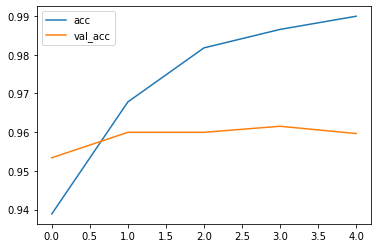

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

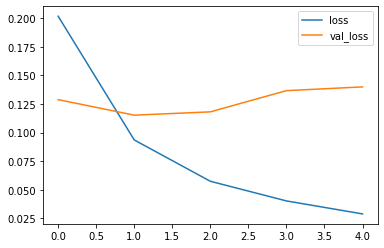

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Sentiment Analysis Output

In [22]:
output_df = pd.DataFrame(columns=['Text', 'Label'])

def predict_sentiment(text):
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=200)
    prediction = int(model.predict(text_pad).round().item())
    if sentiment_label[1][prediction]==0:
        label = "Not sexist/racist"
    else:
        label = "Sexist/racist"
    row_dict = {'Text':text, 'Label':label}
    return(row_dict)

In [23]:
test_sentence1 = "@user  2016 is still alive ! black man is forced into coffin by white south africans "
output_df = output_df.append(predict_sentiment(test_sentence1), ignore_index=True)

test_sentence2 = "i fail to understand how, in this day, people can believe that race or sexual orientation can define a person as bad or wrong. #smh  "
output_df = output_df.append(predict_sentiment(test_sentence2), ignore_index=True)

test_sentence3 = "that moment when your recording goes from good to bad  "
output_df = output_df.append(predict_sentiment(test_sentence3), ignore_index=True)

test_sentence4 = "@user please retweet video that sparks outrage: white officer arrested black mother after littering argument  # "
output_df = output_df.append(predict_sentiment(test_sentence4), ignore_index=True)

test_sentence5 = "my whole family is asleep and of course it's the one time that we're all in separate rooms so i can't even go turn a light on to read  "
output_df = output_df.append(predict_sentiment(test_sentence5), ignore_index=True)

test_sentence6 = "i'm checking the tags on my t-shis and 85% of them are made in china, some haiti, india, nicaragua, honduras &amp; jus 2 in the u.s   Ã°ÂŸÂ˜ÂŸÃ°ÂŸÂ˜Â¥"
output_df = output_df.append(predict_sentiment(test_sentence6), ignore_index=True)

test_sentence7 = "feeling so  ..  being complemented is amazing #being #nice #costs #nothing Ã°ÂŸÂ˜Â˜Ã°ÂŸÂ’Â—"
output_df = output_df.append(predict_sentiment(test_sentence7), ignore_index=True)

test_sentence8 = "poc who allow white ppl to exotify and fetishize them...i...good..bye.   #cringewohy"
output_df = output_df.append(predict_sentiment(test_sentence8), ignore_index=True)

test_sentence9 = "that moment you get an early morning email from @user who is pumped about his #pens #nhl #champions  "
output_df = output_df.append(predict_sentiment(test_sentence9), ignore_index=True)

test_sentence10 = "racism at home and anti- advice for others: we're good at both. "
output_df = output_df.append(predict_sentiment(test_sentence10), ignore_index=True)

In [24]:
test_sentence11 = "can't trust nobody smh i'm always the one to get hu at the end   #instagramers #summer #pay #leaves   #early #winter #fun #insta..."
output_df = output_df.append(predict_sentiment(test_sentence11), ignore_index=True)

test_sentence12 = "there is nothing wrong with being completely done dorm shopping for an august 2 depaure is there?   #movingon #ua20 #thebig3"
output_df = output_df.append(predict_sentiment(test_sentence12), ignore_index=True)

test_sentence13 = "kicking off about #robbiewilliams acting slutty on #bbc. #littlemix do it every time and no one bats a lid.  against men! ;)"
output_df = output_df.append(predict_sentiment(test_sentence13), ignore_index=True)

test_sentence14 = "a rule of an incredible evening: never cheat on a rooftop, even if it's windy   #actor #chiling #newyork #love "
output_df = output_df.append(predict_sentiment(test_sentence14), ignore_index=True)

test_sentence15 = "virginia kkk leader: we're not racist, we're just misunderstood christians #trumpracist  #trumpconaist  "
output_df = output_df.append(predict_sentiment(test_sentence15), ignore_index=True)

test_sentence16 = "words to live by, you can never laugh enough!   #poland #pnw #wordsofwisdom #laugh #funÃ¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence16), ignore_index=True)

test_sentence17 = "most  country argues over different shades of black! Ã°ÂŸÂ˜Â¨ Ã°ÂŸÂ˜Â¬ Ã°ÂŸÂ‘Â‡  "
output_df = output_df.append(predict_sentiment(test_sentence17), ignore_index=True)

test_sentence18 = "i am secure. #i_am #positive #affirmation     "
output_df = output_df.append(predict_sentiment(test_sentence18), ignore_index=True)

test_sentence19 = "planning day today with my new september role hat on #nervous  "
output_df = output_df.append(predict_sentiment(test_sentence19), ignore_index=True)

test_sentence20 = "great speech war veteran  #iraq #war #profit  #military #invasion"
output_df = output_df.append(predict_sentiment(test_sentence20), ignore_index=True)

In [25]:
test_sentence21 = " @user i fail to understand how, in this day, people can believe that race or sexual orientation can define a person as bad or wronÃ¢Â€Â¦"
output_df = output_df.append(predict_sentiment(test_sentence21), ignore_index=True)

test_sentence22 = "i'm so sad for all that had happened in orlando... Ã°ÂŸÂ’Â”Ã°ÂŸÂ’ÂœÃ°ÂŸÂ’Â™Ã°ÂŸÂ’ÂšÃ°ÂŸÂ’Â›Ã°ÂŸÂ’Âž #prayfororlando #prayfoheworld  Ã¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence22), ignore_index=True)

test_sentence23 = " @user today was a good day because i got to see my little!! @user Ã°ÂŸÂ˜ÂÃ°ÂŸÂ˜Â  "
output_df = output_df.append(predict_sentiment(test_sentence23), ignore_index=True)

test_sentence24 = "who's that ugly\"lady\"? "
output_df = output_df.append(predict_sentiment(test_sentence24), ignore_index=True)

test_sentence25 = "@user new video!  super mario run is sexist!  #christmas #ivankatrump #manspreadingÃ¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence25), ignore_index=True)

test_sentence26 = "i'm just ready to watch the tony's tonight. only thing on my mind all day. #70thannualtonyawards  "
output_df = output_df.append(predict_sentiment(test_sentence26), ignore_index=True)

test_sentence27 = "welligtalea  #divulgaÃƒÂ§ÃƒÂ£oeparceria #inshot #girls #cute #summer #blur #sun   #fun #dogÃ¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence27), ignore_index=True)

test_sentence28 = "that's harsh,  even in these post #brexit,  #xenophobia,   times.  what next, a charity called send the buggÃ¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence28), ignore_index=True)

test_sentence29 = "@user #thanks for sharing about  , have a great friday :) Ã°ÂŸÂ”Â¹Ã°ÂŸÂ†Â“grow followers Ã¢ÂžÂª  Ã°ÂŸÂ†Â“Ã°ÂŸÂ”Â¹"
output_df = output_df.append(predict_sentiment(test_sentence29), ignore_index=True)

test_sentence30 = "when your gf leaves you on the floor collapsing at her place without helping you....  #chototel #silva #india #london"
output_df = output_df.append(predict_sentiment(test_sentence30), ignore_index=True)

In [26]:
test_sentence31 = "oh yeah...   #buhday @user you're always in my dreams... and then those dreams are always #moist #friendship #shuuuuuuuuuuuaa"
output_df = output_df.append(predict_sentiment(test_sentence31), ignore_index=True)

test_sentence32 = "performing tomorrow, im feeling anxious Ã°ÂŸÂ˜Â’Ã°ÂŸÂ‘ÂÃ°ÂŸÂÂ»   #performing #singing   #anxious #edinburghÃ¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence32), ignore_index=True)

test_sentence33 = "black dad puts  baby mama on blast after he takes their biracial daughter to get braids "
output_df = output_df.append(predict_sentiment(test_sentence33), ignore_index=True)

test_sentence34 = "#allahsoil the term jihad is a highly-contested concept.    Ã¢Â€Â¦  #teambts #teamsuperjuniorÃ¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence34), ignore_index=True)

test_sentence35 = "even the mere perception is bad business for  the nba brand   "
output_df = output_df.append(predict_sentiment(test_sentence35), ignore_index=True)

test_sentence36 = "i don't get drunk! i get awesome! #sober #soberlife #sobergirls #lifechanges  Ã¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence36), ignore_index=True)

test_sentence37 = "walking a calico in batman boxers. like a mature person. Ã¢Â˜Â€Ã¯Â¸Â#bigender Ã°ÂŸÂÂ± #darkknight #kitty  Ã¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence37), ignore_index=True)

test_sentence38 = "just got a new #gadget and i am super  ! watch me open the box on my #vlog at "
output_df = output_df.append(predict_sentiment(test_sentence38), ignore_index=True)

test_sentence39 = "@user hidden  in #america is as rampant as blatant racism.  @user @user @user @user"
output_df = output_df.append(predict_sentiment(test_sentence39), ignore_index=True)

test_sentence40 = "so nice to be here...hope am gonna have fun.....  weekend"
output_df = output_df.append(predict_sentiment(test_sentence40), ignore_index=True)

In [27]:
test_sentence41 = "as if reel are letting girls in first and there's a massive queue for guys "
output_df = output_df.append(predict_sentiment(test_sentence41), ignore_index=True)

test_sentence42 = "@user @user @user    #smileyong along with #kingconrad @user make me go through hell @user   Ã°ÂŸÂ’Â¡Ã°ÂŸÂ‘Â‰Ã¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence42), ignore_index=True)

test_sentence43 = "#germanyhetalia   bull up: you will dominate your bull and you will direct it whatever you want it to do. wh "
output_df = output_df.append(predict_sentiment(test_sentence43), ignore_index=True)

test_sentence44 = "i always try to do my best to express my feeling to @user but unfounately my english is sucks :(   "
output_df = output_df.append(predict_sentiment(test_sentence44), ignore_index=True)

test_sentence45 = "#ruleoflaw for #kamalnath is no diff frm rule of law in case of safrron terror sadhvi.    "
output_df = output_df.append(predict_sentiment(test_sentence45), ignore_index=True)

test_sentence46 = "really sad that people are whistling during the hymn of russia! #euro2016 #engrus   #befair"
output_df = output_df.append(predict_sentiment(test_sentence46), ignore_index=True)

test_sentence47 = "are you #black &amp; feel like the  are stomping on you? listen  #retweet #tampa #miamiÃ¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence47), ignore_index=True)

test_sentence48 = "@user if a \"negro\" is good he is allowed to go to #heaven as a servant for all eternity according to #mormonism. mormonisÃ¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence48), ignore_index=True)

test_sentence49 = "rode 11 miles on the bike this afternoon &amp; thought about @user &amp; #orlandonightclubshooting. what is wrong with us?  "
output_df = output_df.append(predict_sentiment(test_sentence49), ignore_index=True)

test_sentence50 = "observation of life... #friends   #fun #summer #holiday #travel #adventure #freespiritsÃ¢Â€Â¦ "
output_df = output_df.append(predict_sentiment(test_sentence50), ignore_index=True)

output_df

,Text,Label
0,@user 2016 is still alive ! black man is forc...,Sexist/racist
1,"i fail to understand how, in this day, people ...",Not sexist/racist
2,that moment when your recording goes from good...,Not sexist/racist
3,@user please retweet video that sparks outrage...,Sexist/racist
4,my whole family is asleep and of course it's t...,Not sexist/racist
5,i'm checking the tags on my t-shis and 85% of ...,Not sexist/racist
6,feeling so .. being complemented is amazing ...,Not sexist/racist
7,poc who allow white ppl to exotify and fetishi...,Not sexist/racist
8,that moment you get an early morning email fro...,Not sexist/racist
9,racism at home and anti- advice for others: we...,Sexist/racist


In [35]:
data = {
    'Label':['Sexist/racist', 'Not sexist/racist'],
    'Count':[output_df[(output_df.Label) == 'Sexist/racist'].shape[0], 
             output_df[(output_df.Label) == 'Not sexist/racist'].shape[0]]
}
count_df = pd.DataFrame(data, columns = ['Label', 'Count'])
count_df

,Label,Count
0,Sexist/racist,15
1,Not sexist/racist,35


<AxesSubplot:xlabel='Label', ylabel='count'>

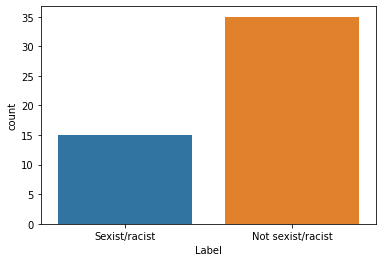

In [31]:
sns.countplot(x = 'Label',data = output_df)